Numpy &nbsp;&nbsp;&nbsp;&nbsp;: Numerical library used for manipulating vectors like dot product, vector product, sum etc
<br>
Matplotlib : 2D Ploting library to visulize graphs
             Here used to plot image of number with 28x28 dimensional pixel values
<br>
Pandas &nbsp;&nbsp;&nbsp;: Used for working with tables efficiently
             Here used to read .csv file of mnist database
<br>
Random &nbsp;&nbsp;: Generate pseudo random numbers
             Here used for shuffeling data in place

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

<pre>
Applies activation function after output from every layer
To find derivative of activators, include "derivative=True" in argument
</pre>

In [2]:
class activator:

    def sigmoid(z, derivative=False):
        if derivative==True:
            return (activator.sigmoid(z=z, derivative=False) * (1 - activator.sigmoid(z=z, derivative=False)))
        return (1.0 / (1.0 + np.exp(-z)))

    def softmax(z, derivative=False):
        if derivative==True:
            return (activator.softmax(z=z, derivative=False) * (1 - activator.softmax(z=z, derivative=False)))
        return (np.exp(z) / np.sum(np.exp(z)))

    def tanh(z, derivative=False):
        if derivative==True:
            return (activator.tanh(z=z, derivative=False) * (1 - activator.tanh(z=z, derivative=False)))
        return (np.tanh(z))

    def relu(z, derivative=False):
        if derivative==True:
            return (float(z>0))
        return (np.maximum(z, 0))


<pre>

                              O
                              O
                              O
        O                     O
        O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     |
        O                     O                     |
        |                     O                     |
        |                     O                     |
        |                     O                     |
        |                     |                     |
        |                     |                     |
        |                     |                     |
        |                     |                     |
        |                     |                     |
      Input                Hidden                Output
      Layer                Layer                  Layer
 (inp_size, no_inp)  (hid_size, inp_size)  (out_size, hid_size)
    (784, 1000)          (1500, 784)            (10, 1500)
</pre>

<pre>
Network : A class which creates a network as given above and initialize weights and biases randomly
          Further, netowrk is trained my method gradient descent, grad_descn
</pre>

In [3]:
class network(object):

#   error : List of errors predicted after iterating over all epochs for ploting error vs epochs graph
#   error.append(train_error)
    error = []

    def __init__(self, size):
        self.num_layers = len(size)
#       Initialize biases randomly        
        self.biases  = [np.zeros([y, 1]) for y in size[1:]]
#       Initialize weights randomly    
        self.weights = [np.random.randn(y, x)*0.01 for x, y in zip(size[:-1], size[1:])]

#   Iterates forward to generate results predicted by network
    def train_feed_forward(self, size, input, activators, mini_batch_size):
#       $self.z : List of numpy array of outputs of every neuron
        self.z = [np.zeros([y, mini_batch_size]) for y in size[:]]
#       i : Used as index for using actiator function from list "activators"
        i=0
#       $self.z[0] : Same as input values
        self.z[0] = input
#       Total iteration of loop is same as number of layers present in model
        for bias, weight in zip(self.biases, self.weights):
#           input : Placeholder to calculate prediction by model and self.z
#             y   =     m   *   x   +  c
#           input = (weight * input) + bias
            input = (np.dot(weight, input) + bias)
            self.z[i+1] = input
#           input = activator(input)
            if(activators[i]=="sigmoid"):
                input = activator.sigmoid(z=input, derivative=False)
            elif(activators[i]=="softmax"):
                input = activator.softmax(z=input, derivative=False)
            elif(activators[i]=="tanh"):
                input = activator.tanh(z=input, derivative=False)
            elif(activators[i]=="relu"):
                input = activator.relu(z=input, derivative=False)
            i=i+1
#       returns output from last layer
        return input
 
    
#   Mean squared error
#   (predicted - expected)**2
    def loss(self, Y, Y_hat, derivative=False):
        if derivative==True:
            return (Y_hat-Y)
        return ((Y_hat - Y) ** 2)
    

#   Implementation of Gradient Descent Algorithm
    def grad_descn(self, size, expected_value, training_data, activators, alpha, mini_batch_size, epochs):
#       Result : Numpy Array of One Hot Encoded expected value
#                Just like demultiplexers
#
#                0   1   2   3   4   5   6   7   8   9
#
#                1   0   0   0   0   0   0   0   0   0
#                0   1   0   0   0   0   0   0   0   0
#                0   0   1   0   0   0   0   0   0   0
#                0   0   0   1   0   0   0   0   0   0
#                0   0   0   0   1   0   0   0   0   0
#                0   0   0   0   0   1   0   0   0   0
#                0   0   0   0   0   0   1   0   0   0
#                0   0   0   0   0   0   0   1   0   0
#                0   0   0   0   0   0   0   0   1   0
#                0   0   0   0   0   0   0   0   0   1
#
        result = np.zeros([size[-1], len(training_data.T)])
        for i in range(len(training_data)):
            result[expected_value[0, i], i]=True

#       Training the network for $epochs number of times
#       Iterates again and again through the same data
        for epoch_no in range(epochs):
            print(epoch_no)
#           $nabla_b : List of Numpy Array of Gradients of every Biases
#           $nabla_w : List of Numpy Array of Gradients of every Weights
            nabla_b = [np.zeros([y, 1]) for y in size[1:]]
            nabla_w = [np.zeros([y, x]) for x, y in zip(size[:-1], size[1:])]
#           Splits data into mini batches for training
#           Weights and Biases updates after every iterarion over mini batch
            for k in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[:, k:k+mini_batch_size]
                y = result[:, k:k+mini_batch_size]
#               delta_nabla   : Error to be corrected in prediction
#                               List of List of Numpy Arrays of delta_nabla_b and delta_nabla_w
#                               [delta_nabla_b, delta_nabla_w]
#               delta_nabla_b : List of Numpy Arrays of Gradient of biases to be corrected
#               delta_nabla_b : List of Numpy Arrays of Gradient of weights to be corrected
                delta_nabla = self.find_nabla(size=size, activators=activators, mini_batch=mini_batch, mini_batch_size=mini_batch_size, y=y, alpha=alpha)
#               self.biases  = self.biases - (learning_rate * error)
#                              for every neurons
#               self.weights = self.weights - (learning_rate * error)
#                              for every neuron
                self.biases  = [b-((alpha/mini_batch_size)*n_b) for b, n_b in zip(self.biases, delta_nabla[0])]
                self.weights = [w-((alpha/mini_batch_size)*n_w) for w, n_w in zip(self.weights, delta_nabla[1])]

#               y_hat : Result predicted by model for current mini batch to calculate error
                y_hat = test_feed_forward(size=size, input=mini_batch, activators=activators)
#               train_error : Sum of errors of predictions of current mini batch
                train_error = np.sum((1/mini_batch_size)*self.loss(Y=y, Y_hat=y_hat))
#               print(train_error)
                self.error.append(train_error)

#   On every iteration of mini batch, control is parsed to find gradient of current mini batch and back propogation
    def find_nabla(self, size, activators, mini_batch, mini_batch_size, y, alpha):
#       y_hat : Result predicted by model for back propogation
        y_hat = self.train_feed_forward(size=size, input=mini_batch, activators=activators, mini_batch_size=mini_batch_size)
#       cost : Mean of loss over current mini batch
        cost = (1/mini_batch_size)*self.loss(Y=y, Y_hat=y_hat)
#       error : Sum of cost of outputs
#       delta_nabla_b : List of Numpy Array of error of gradient of biases  of every neurons 
#       delta_nabla_w : List of Numpy Array of error of gradient of weights of every neurons 
        delta_nabla_b = [np.zeros([y, 1]) for y in size[1:]]
        delta_nabla_w = [np.zeros([y, x]) for x, y in zip(size[:-1], size[1:])]
#       Iteration over every elements of mini batch
#       delta : Numpy Array of Error of prediction in last layer of every elements in mini batch
        if activators[-1] == "sigmoid":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.sigmoid(z=y_hat, derivative=True)
        elif activators[-1] == "softmax":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.softmax(z=y_hat, derivative=True)
        elif activators[-1] == "tanh":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.tanh(z=y_hat, derivative=True)
        elif activators[-1] == "relu":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.relu(z=y_hat, derivative=True)
        delta_nabla_b[-1] += np.sum(delta)
        delta_nabla_w[-1] += np.dot(delta, self.z[-2].T)
#       Back Propogation Algorithm : Iteration over all the layers from back
        for layer_no in range(-1, -self.num_layers+2, -1):
#           delta : Numpy Array of Error of prediction in current layer of every elements in mini batch
            if activators[layer_no] == "sigmoid":
                delta = np.dot(self.weights[layer_no].T, delta) * activator.sigmoid(z=self.z[layer_no-1], derivative=True)
            elif activators[layer_no] == "softmax":
                delta = np.dot(self.weights[layer_no].T, delta) * activator.softmax(z=self.z[layer_no-1], derivative=True)
            elif activators[layer_no] == "tanh":    
                delta = np.dot(self.weights[layer_no].T, delta) * activator.tanh(z=self.z[layer_no-1], derivative=True)
            elif activators[layer_no] == "relu":
                delta = np.dot(self.weights[layer_no].T, delta) * activator.relu(z=self.z[layer_no-1], derivative=True)
            delta_nabla_b[layer_no-1] += np.sum(delta)
            delta_nabla_w[layer_no-1] += np.dot(delta, self.z[layer_no-2].T)
        delta_nabla = [delta_nabla_b, delta_nabla_w]
        return delta_nabla


In [4]:
#   Feed Forward Network for test data
def test_feed_forward(size, input, activators):
       i=0
       for bias, weight in zip(mnist.biases, mnist.weights):
           input = (np.dot(weight, input) + bias)
           if activators[i]=="sigmoid":
               input = activator.sigmoid(z=input, derivative=False)
           elif activators[i]=="softmax":
               input = activator.softmax(z=input, derivative=False)
           elif activators[i]=="tanh":
               input = activator.tanh(z=input, derivative=False)
           elif activators[i]=="relu":
               input = activator.relu(z=input, derivative=False)
           i=i+1
       return input


In [5]:
#   train_data_frame : Pandas dataframe of mnist dataset in csv file
train_data_frame = pd.read_csv('/home/pushpull/mount/intHdd/mnist/mnist_train.csv', header=None)

In [6]:
#   Conversion of Pandas dataframe into numpy arrays
train_dataset = np.array(train_data_frame)

<pre>
It is good practice to first shuffle the data randomly to avoid fitting the model for some particular output
</pre>

In [7]:
#   Shuffling the data using "random" library
np.random.shuffle(train_dataset)

train_lable = np.array([train_dataset[:, 0]])
train_data = np.array(train_dataset[:, 1:785]).T

print(train_dataset.shape)
print(train_lable.shape)
print(train_data.shape)

(60000, 785)
(1, 60000)
(784, 60000)


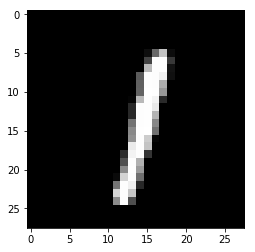

In [8]:
plt.imshow(train_dataset[0, 1:785].reshape(28, 28), 'gray')

In [9]:
#   neuron_layer : Dictionary of number of neurons in model and activation functions for every layer
neuron_layer = {"size_layers": [784, 2100, 10], "activations": ["tanh", "sigmoid"] }

In [10]:
#   Initializing network with random weights and biases
mnist = network(neuron_layer["size_layers"])

In [11]:
#   Training network using Gradient Descent Algorithm
mnist.grad_descn(size=neuron_layer["size_layers"], expected_value=train_lable, training_data=train_data, activators=neuron_layer["activations"], alpha=0.01, mini_batch_size=2300, epochs=90)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


In [12]:
test_data_frame = pd.read_csv('/home/pushpull/mount/intHdd/mnist/mnist_test.csv', header=None)

test_dataset = np.array(test_data_frame)

test_lable = np.array([test_dataset[:, 0]]).T
test_data = np.array(test_dataset[:, 1:785])

result = test_feed_forward(size=neuron_layer["size_layers"], input=test_data.T, activators=neuron_layer["activations"])

no_trues = 0

for i in range(len(test_data)):
    max_ans = result[0, i]
    max_ind = 0
    for j in range(10):
        if(result[j, i]>max_ans):
            max_ind = j
            max_ans = result[j, i]
    print(i, test_lable[i], max_ind)
    if(test_lable[i]==max_ind):
        no_trues+=1


0 [7] 7
1 [2] 2
2 [1] 1
3 [0] 0
4 [4] 4
5 [1] 1
6 [4] 4
7 [9] 9
8 [5] 2
9 [9] 9
10 [0] 0
11 [6] 0
12 [9] 9
13 [0] 0
14 [1] 1
15 [5] 3
16 [9] 9
17 [7] 7
18 [3] 3
19 [4] 4
20 [9] 9
21 [6] 6
22 [6] 7
23 [5] 5
24 [4] 4
25 [0] 0
26 [7] 7
27 [4] 4
28 [0] 0
29 [1] 1
30 [3] 3
31 [1] 1
32 [3] 3
33 [4] 6
34 [7] 7
35 [2] 2
36 [7] 7
37 [1] 1
38 [2] 3
39 [1] 1
40 [1] 1
41 [7] 7
42 [4] 4
43 [2] 2
44 [3] 3
45 [5] 5
46 [1] 3
47 [2] 2
48 [4] 4
49 [4] 4
50 [6] 6
51 [3] 3
52 [5] 5
53 [5] 8
54 [6] 8
55 [0] 0
56 [4] 4
57 [1] 1
58 [9] 9
59 [5] 5
60 [7] 7
61 [8] 8
62 [9] 9
63 [3] 2
64 [7] 7
65 [4] 4
66 [6] 0
67 [4] 4
68 [3] 3
69 [0] 0
70 [7] 7
71 [0] 0
72 [2] 0
73 [9] 7
74 [1] 1
75 [7] 7
76 [3] 3
77 [2] 7
78 [9] 9
79 [7] 7
80 [7] 9
81 [6] 6
82 [2] 2
83 [7] 7
84 [8] 5
85 [4] 4
86 [7] 7
87 [3] 3
88 [6] 6
89 [1] 1
90 [3] 3
91 [6] 6
92 [9] 8
93 [3] 3
94 [1] 1
95 [4] 4
96 [1] 3
97 [7] 7
98 [6] 6
99 [9] 9
100 [6] 6
101 [0] 0
102 [5] 5
103 [4] 4
104 [9] 9
105 [9] 9
106 [2] 2
107 [1] 1
108 [9] 9
109 [4] 4
110 [8] 8


1500 [7] 1
1501 [9] 9
1502 [8] 3
1503 [3] 3
1504 [0] 0
1505 [7] 7
1506 [2] 2
1507 [7] 7
1508 [9] 9
1509 [4] 4
1510 [5] 5
1511 [4] 4
1512 [9] 9
1513 [3] 3
1514 [2] 8
1515 [1] 1
1516 [4] 4
1517 [0] 0
1518 [2] 2
1519 [3] 3
1520 [7] 7
1521 [5] 5
1522 [7] 9
1523 [8] 8
1524 [8] 8
1525 [5] 3
1526 [0] 3
1527 [1] 5
1528 [1] 1
1529 [4] 4
1530 [8] 7
1531 [3] 3
1532 [9] 9
1533 [0] 0
1534 [0] 0
1535 [0] 0
1536 [6] 2
1537 [6] 6
1538 [2] 2
1539 [3] 3
1540 [7] 7
1541 [8] 8
1542 [4] 4
1543 [7] 7
1544 [7] 7
1545 [9] 9
1546 [2] 2
1547 [4] 4
1548 [1] 1
1549 [4] 6
1550 [5] 5
1551 [2] 8
1552 [4] 4
1553 [9] 3
1554 [9] 9
1555 [1] 1
1556 [8] 8
1557 [4] 4
1558 [0] 8
1559 [9] 7
1560 [8] 8
1561 [4] 4
1562 [8] 8
1563 [7] 7
1564 [7] 7
1565 [0] 0
1566 [7] 7
1567 [8] 8
1568 [8] 8
1569 [6] 6
1570 [0] 0
1571 [4] 9
1572 [8] 8
1573 [8] 8
1574 [2] 2
1575 [4] 4
1576 [7] 7
1577 [6] 6
1578 [6] 6
1579 [6] 8
1580 [4] 4
1581 [7] 9
1582 [1] 1
1583 [8] 8
1584 [8] 8
1585 [2] 2
1586 [3] 3
1587 [6] 6
1588 [3] 3
1589 [0] 0
1590 [0] 0

2261 [1] 1
2262 [7] 7
2263 [9] 9
2264 [4] 9
2265 [4] 4
2266 [1] 5
2267 [6] 6
2268 [7] 7
2269 [2] 2
2270 [7] 7
2271 [8] 8
2272 [8] 0
2273 [1] 1
2274 [9] 9
2275 [7] 7
2276 [1] 1
2277 [1] 1
2278 [7] 7
2279 [5] 8
2280 [3] 3
2281 [3] 3
2282 [5] 3
2283 [1] 1
2284 [3] 3
2285 [7] 7
2286 [6] 6
2287 [1] 1
2288 [3] 3
2289 [8] 8
2290 [7] 7
2291 [5] 3
2292 [9] 9
2293 [9] 6
2294 [0] 0
2295 [0] 0
2296 [2] 2
2297 [8] 2
2298 [8] 3
2299 [2] 7
2300 [3] 3
2301 [7] 7
2302 [1] 1
2303 [3] 3
2304 [0] 0
2305 [3] 3
2306 [4] 4
2307 [4] 4
2308 [3] 3
2309 [8] 8
2310 [9] 9
2311 [2] 2
2312 [3] 3
2313 [9] 9
2314 [7] 7
2315 [1] 1
2316 [1] 1
2317 [7] 7
2318 [0] 0
2319 [4] 6
2320 [9] 9
2321 [6] 6
2322 [5] 3
2323 [9] 9
2324 [1] 1
2325 [7] 7
2326 [0] 0
2327 [2] 2
2328 [0] 5
2329 [0] 0
2330 [4] 4
2331 [6] 6
2332 [7] 7
2333 [0] 0
2334 [7] 7
2335 [1] 1
2336 [4] 4
2337 [6] 6
2338 [4] 4
2339 [5] 8
2340 [4] 4
2341 [9] 9
2342 [9] 3
2343 [1] 1
2344 [7] 7
2345 [9] 7
2346 [5] 5
2347 [3] 3
2348 [3] 9
2349 [8] 8
2350 [2] 2
2351 [3] 0

3094 [3] 3
3095 [5] 5
3096 [4] 4
3097 [1] 1
3098 [7] 7
3099 [1] 1
3100 [5] 8
3101 [7] 7
3102 [5] 5
3103 [7] 7
3104 [3] 3
3105 [2] 2
3106 [2] 3
3107 [7] 7
3108 [3] 3
3109 [7] 7
3110 [3] 5
3111 [7] 7
3112 [8] 8
3113 [5] 5
3114 [4] 6
3115 [5] 5
3116 [2] 2
3117 [5] 9
3118 [6] 6
3119 [5] 5
3120 [3] 3
3121 [6] 6
3122 [7] 7
3123 [4] 4
3124 [1] 1
3125 [7] 7
3126 [1] 1
3127 [5] 5
3128 [2] 2
3129 [3] 3
3130 [6] 0
3131 [3] 3
3132 [1] 5
3133 [4] 9
3134 [2] 2
3135 [6] 6
3136 [7] 9
3137 [4] 4
3138 [3] 3
3139 [8] 3
3140 [0] 0
3141 [6] 6
3142 [2] 2
3143 [1] 1
3144 [6] 6
3145 [5] 9
3146 [3] 9
3147 [9] 9
3148 [1] 1
3149 [9] 9
3150 [3] 3
3151 [2] 1
3152 [1] 1
3153 [8] 8
3154 [4] 4
3155 [4] 4
3156 [6] 6
3157 [5] 7
3158 [8] 2
3159 [6] 6
3160 [9] 9
3161 [7] 7
3162 [7] 7
3163 [8] 8
3164 [6] 6
3165 [9] 9
3166 [7] 7
3167 [3] 1
3168 [9] 9
3169 [4] 4
3170 [0] 0
3171 [5] 5
3172 [4] 4
3173 [6] 8
3174 [4] 4
3175 [1] 1
3176 [2] 2
3177 [3] 3
3178 [0] 0
3179 [0] 0
3180 [2] 2
3181 [6] 6
3182 [6] 6
3183 [5] 5
3184 [7] 7

3927 [9] 7
3928 [5] 5
3929 [5] 8
3930 [1] 1
3931 [6] 6
3932 [2] 2
3933 [2] 2
3934 [8] 8
3935 [6] 6
3936 [7] 7
3937 [1] 1
3938 [4] 4
3939 [6] 6
3940 [0] 0
3941 [4] 6
3942 [0] 0
3943 [3] 3
3944 [3] 3
3945 [2] 2
3946 [2] 8
3947 [3] 3
3948 [6] 6
3949 [8] 3
3950 [9] 9
3951 [8] 0
3952 [5] 5
3953 [3] 3
3954 [8] 9
3955 [5] 9
3956 [4] 4
3957 [5] 5
3958 [2] 2
3959 [0] 0
3960 [5] 5
3961 [6] 6
3962 [3] 4
3963 [2] 2
3964 [8] 8
3965 [3] 3
3966 [9] 9
3967 [9] 7
3968 [5] 8
3969 [7] 7
3970 [9] 9
3971 [4] 4
3972 [6] 6
3973 [7] 7
3974 [1] 1
3975 [3] 3
3976 [7] 7
3977 [3] 3
3978 [6] 6
3979 [6] 6
3980 [0] 0
3981 [9] 9
3982 [0] 0
3983 [1] 1
3984 [9] 9
3985 [9] 4
3986 [2] 2
3987 [8] 8
3988 [8] 3
3989 [0] 0
3990 [1] 1
3991 [6] 6
3992 [9] 9
3993 [7] 7
3994 [5] 5
3995 [3] 3
3996 [4] 4
3997 [7] 7
3998 [4] 6
3999 [9] 9
4000 [9] 2
4001 [4] 4
4002 [3] 5
4003 [6] 6
4004 [3] 3
4005 [1] 1
4006 [1] 1
4007 [7] 3
4008 [6] 6
4009 [9] 9
4010 [1] 1
4011 [8] 8
4012 [4] 4
4013 [1] 3
4014 [1] 1
4015 [9] 9
4016 [9] 9
4017 [4] 9

4752 [9] 9
4753 [8] 8
4754 [1] 1
4755 [3] 8
4756 [8] 8
4757 [0] 0
4758 [3] 3
4759 [1] 1
4760 [7] 7
4761 [9] 1
4762 [5] 5
4763 [5] 6
4764 [1] 1
4765 [6] 6
4766 [5] 8
4767 [7] 7
4768 [4] 4
4769 [9] 9
4770 [3] 3
4771 [5] 5
4772 [4] 4
4773 [7] 7
4774 [1] 1
4775 [2] 2
4776 [0] 0
4777 [8] 8
4778 [1] 1
4779 [6] 6
4780 [0] 0
4781 [7] 7
4782 [3] 3
4783 [4] 9
4784 [7] 7
4785 [3] 8
4786 [9] 9
4787 [6] 6
4788 [0] 0
4789 [8] 8
4790 [6] 6
4791 [4] 9
4792 [8] 8
4793 [7] 7
4794 [7] 7
4795 [9] 9
4796 [3] 3
4797 [8] 8
4798 [6] 6
4799 [9] 9
4800 [7] 7
4801 [2] 2
4802 [3] 3
4803 [4] 4
4804 [0] 0
4805 [2] 2
4806 [1] 1
4807 [8] 0
4808 [3] 8
4809 [5] 5
4810 [5] 5
4811 [7] 7
4812 [2] 1
4813 [4] 9
4814 [6] 3
4815 [7] 7
4816 [2] 2
4817 [8] 8
4818 [3] 3
4819 [0] 5
4820 [8] 8
4821 [7] 7
4822 [8] 8
4823 [9] 4
4824 [0] 0
4825 [8] 8
4826 [4] 9
4827 [4] 4
4828 [5] 6
4829 [8] 3
4830 [5] 5
4831 [6] 6
4832 [6] 6
4833 [3] 3
4834 [0] 0
4835 [9] 9
4836 [3] 3
4837 [7] 2
4838 [6] 5
4839 [8] 8
4840 [9] 9
4841 [3] 3
4842 [4] 4

5593 [0] 6
5594 [1] 1
5595 [2] 2
5596 [3] 3
5597 [4] 9
5598 [5] 5
5599 [6] 6
5600 [7] 7
5601 [8] 8
5602 [9] 9
5603 [0] 0
5604 [1] 1
5605 [2] 2
5606 [3] 3
5607 [4] 4
5608 [5] 5
5609 [6] 6
5610 [7] 7
5611 [8] 1
5612 [9] 9
5613 [0] 6
5614 [1] 1
5615 [2] 2
5616 [3] 3
5617 [4] 4
5618 [5] 5
5619 [6] 6
5620 [7] 9
5621 [8] 4
5622 [9] 9
5623 [3] 3
5624 [5] 5
5625 [3] 3
5626 [2] 2
5627 [9] 9
5628 [3] 3
5629 [2] 2
5630 [1] 1
5631 [4] 4
5632 [5] 5
5633 [5] 5
5634 [2] 0
5635 [3] 3
5636 [2] 2
5637 [1] 1
5638 [3] 3
5639 [9] 9
5640 [7] 7
5641 [2] 2
5642 [1] 8
5643 [2] 2
5644 [8] 8
5645 [9] 9
5646 [1] 1
5647 [8] 5
5648 [8] 8
5649 [7] 9
5650 [8] 8
5651 [1] 1
5652 [0] 0
5653 [0] 0
5654 [7] 7
5655 [7] 7
5656 [8] 8
5657 [7] 7
5658 [5] 5
5659 [0] 0
5660 [6] 6
5661 [1] 1
5662 [5] 5
5663 [7] 7
5664 [4] 4
5665 [6] 6
5666 [1] 1
5667 [2] 2
5668 [5] 5
5669 [0] 0
5670 [7] 7
5671 [9] 9
5672 [9] 9
5673 [0] 5
5674 [3] 3
5675 [8] 8
5676 [4] 4
5677 [4] 6
5678 [8] 5
5679 [1] 1
5680 [8] 8
5681 [6] 6
5682 [5] 8
5683 [9] 9

6519 [2] 2
6520 [9] 9
6521 [2] 2
6522 [5] 5
6523 [8] 8
6524 [9] 9
6525 [5] 5
6526 [0] 0
6527 [1] 1
6528 [2] 2
6529 [4] 4
6530 [5] 5
6531 [6] 6
6532 [0] 7
6533 [1] 1
6534 [2] 2
6535 [3] 3
6536 [4] 4
6537 [5] 5
6538 [6] 6
6539 [7] 7
6540 [1] 1
6541 [2] 2
6542 [3] 3
6543 [4] 4
6544 [5] 5
6545 [1] 1
6546 [0] 0
6547 [4] 4
6548 [5] 5
6549 [6] 6
6550 [6] 6
6551 [3] 3
6552 [4] 6
6553 [4] 4
6554 [2] 2
6555 [8] 7
6556 [1] 1
6557 [0] 0
6558 [6] 6
6559 [4] 4
6560 [9] 9
6561 [7] 9
6562 [2] 2
6563 [3] 3
6564 [3] 3
6565 [9] 9
6566 [2] 2
6567 [0] 0
6568 [9] 4
6569 [3] 9
6570 [3] 9
6571 [9] 9
6572 [1] 9
6573 [5] 5
6574 [2] 6
6575 [3] 3
6576 [7] 1
6577 [7] 7
6578 [8] 8
6579 [4] 4
6580 [0] 3
6581 [2] 2
6582 [4] 4
6583 [0] 0
6584 [2] 2
6585 [4] 4
6586 [7] 7
6587 [8] 8
6588 [0] 0
6589 [7] 7
6590 [0] 7
6591 [6] 6
6592 [9] 9
6593 [3] 3
6594 [2] 2
6595 [8] 8
6596 [6] 6
6597 [0] 7
6598 [5] 6
6599 [7] 7
6600 [5] 5
6601 [1] 1
6602 [0] 0
6603 [8] 7
6604 [1] 1
6605 [6] 6
6606 [7] 7
6607 [2] 2
6608 [9] 4
6609 [7] 7

7478 [5] 0
7479 [3] 3
7480 [1] 1
7481 [8] 8
7482 [2] 2
7483 [2] 2
7484 [3] 3
7485 [0] 0
7486 [2] 2
7487 [9] 9
7488 [4] 4
7489 [9] 9
7490 [7] 7
7491 [0] 0
7492 [2] 0
7493 [7] 7
7494 [4] 8
7495 [9] 9
7496 [9] 9
7497 [2] 2
7498 [5] 3
7499 [9] 9
7500 [8] 8
7501 [3] 3
7502 [8] 5
7503 [6] 6
7504 [7] 7
7505 [0] 5
7506 [0] 0
7507 [1] 1
7508 [2] 2
7509 [3] 3
7510 [4] 4
7511 [5] 5
7512 [6] 6
7513 [7] 7
7514 [8] 8
7515 [9] 9
7516 [0] 0
7517 [1] 1
7518 [2] 2
7519 [3] 3
7520 [4] 4
7521 [5] 5
7522 [6] 6
7523 [7] 7
7524 [8] 8
7525 [9] 9
7526 [0] 0
7527 [1] 1
7528 [2] 2
7529 [3] 3
7530 [4] 4
7531 [5] 3
7532 [6] 6
7533 [7] 7
7534 [8] 8
7535 [9] 9
7536 [0] 0
7537 [0] 0
7538 [7] 7
7539 [2] 2
7540 [6] 6
7541 [5] 5
7542 [5] 5
7543 [3] 3
7544 [7] 7
7545 [8] 5
7546 [6] 6
7547 [6] 6
7548 [6] 6
7549 [6] 6
7550 [4] 4
7551 [3] 3
7552 [8] 8
7553 [8] 8
7554 [3] 3
7555 [0] 0
7556 [1] 1
7557 [9] 9
7558 [0] 2
7559 [5] 5
7560 [4] 4
7561 [1] 1
7562 [9] 9
7563 [1] 1
7564 [2] 2
7565 [7] 7
7566 [0] 0
7567 [1] 1
7568 [3] 3

8426 [9] 7
8427 [1] 1
8428 [7] 7
8429 [3] 3
8430 [3] 3
8431 [9] 9
8432 [1] 1
8433 [6] 6
8434 [4] 4
8435 [3] 3
8436 [9] 9
8437 [8] 8
8438 [2] 2
8439 [1] 1
8440 [8] 8
8441 [6] 6
8442 [4] 4
8443 [1] 1
8444 [5] 5
8445 [5] 5
8446 [6] 6
8447 [5] 5
8448 [0] 0
8449 [1] 1
8450 [2] 2
8451 [3] 3
8452 [4] 4
8453 [5] 5
8454 [6] 6
8455 [7] 7
8456 [8] 8
8457 [9] 7
8458 [0] 0
8459 [1] 1
8460 [2] 2
8461 [3] 3
8462 [4] 4
8463 [5] 5
8464 [6] 6
8465 [7] 7
8466 [8] 8
8467 [9] 9
8468 [0] 0
8469 [1] 3
8470 [2] 2
8471 [3] 3
8472 [4] 4
8473 [5] 5
8474 [6] 6
8475 [7] 7
8476 [8] 5
8477 [9] 9
8478 [6] 6
8479 [9] 9
8480 [7] 7
8481 [0] 0
8482 [2] 2
8483 [3] 3
8484 [4] 4
8485 [3] 3
8486 [8] 3
8487 [5] 5
8488 [1] 1
8489 [3] 3
8490 [0] 0
8491 [1] 1
8492 [2] 2
8493 [1] 1
8494 [3] 3
8495 [2] 2
8496 [0] 0
8497 [7] 7
8498 [2] 2
8499 [6] 6
8500 [4] 4
8501 [0] 0
8502 [5] 5
8503 [9] 9
8504 [9] 9
8505 [8] 8
8506 [9] 9
8507 [5] 5
8508 [3] 3
8509 [1] 1
8510 [7] 7
8511 [4] 4
8512 [7] 7
8513 [0] 0
8514 [0] 0
8515 [6] 6
8516 [6] 6

9426 [6] 6
9427 [5] 3
9428 [5] 5
9429 [3] 3
9430 [3] 3
9431 [3] 3
9432 [9] 9
9433 [8] 8
9434 [1] 1
9435 [1] 1
9436 [0] 0
9437 [6] 6
9438 [1] 1
9439 [0] 0
9440 [0] 0
9441 [6] 6
9442 [2] 2
9443 [1] 1
9444 [1] 1
9445 [3] 3
9446 [2] 4
9447 [7] 7
9448 [7] 7
9449 [8] 8
9450 [8] 8
9451 [7] 7
9452 [8] 8
9453 [4] 4
9454 [6] 6
9455 [0] 0
9456 [2] 7
9457 [0] 0
9458 [7] 7
9459 [0] 0
9460 [3] 3
9461 [6] 6
9462 [8] 8
9463 [7] 7
9464 [1] 1
9465 [5] 3
9466 [9] 9
9467 [9] 9
9468 [3] 3
9469 [7] 7
9470 [2] 2
9471 [4] 4
9472 [9] 9
9473 [4] 4
9474 [3] 3
9475 [6] 6
9476 [2] 2
9477 [2] 2
9478 [5] 5
9479 [3] 3
9480 [2] 2
9481 [5] 5
9482 [5] 5
9483 [9] 9
9484 [4] 4
9485 [1] 1
9486 [7] 7
9487 [2] 6
9488 [0] 0
9489 [1] 1
9490 [2] 2
9491 [3] 3
9492 [4] 4
9493 [5] 5
9494 [6] 6
9495 [7] 7
9496 [8] 8
9497 [9] 9
9498 [0] 0
9499 [1] 1
9500 [2] 2
9501 [3] 3
9502 [4] 4
9503 [5] 5
9504 [6] 6
9505 [7] 7
9506 [8] 8
9507 [9] 9
9508 [0] 0
9509 [1] 1
9510 [2] 2
9511 [3] 3
9512 [4] 4
9513 [5] 8
9514 [6] 6
9515 [7] 7
9516 [8] 8

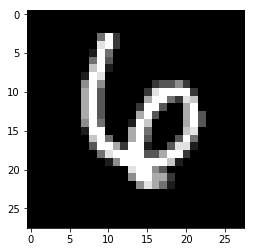

In [13]:
plt.imshow(test_dataset[22, 1:785].reshape(28, 28), 'gray')

In [14]:
print(test_lable.shape)

(10000, 1)


In [15]:
print(test_lable[110])

[8]


In [16]:
print(result.shape)

(10, 10000)


In [17]:
print(no_trues)

8396


In [18]:
print(100.0*(no_trues/len(test_data)))

83.96000000000001


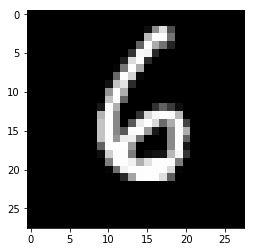

In [19]:
plt.imshow(test_data[91, 0:785].reshape(28, 28), 'gray')

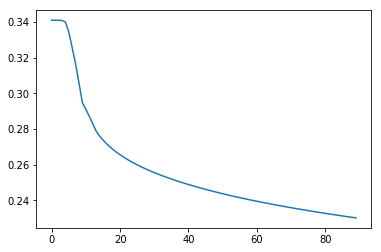

In [20]:
plt.plot(mnist.error)